# Module 1: Python/NumPy Foundations for Machine Learning

## Introduction

Welcome to the first module in our series on neural networks and language modeling! This notebook is designed for senior developers who are new to machine learning but have strong programming backgrounds.

In this module, we'll cover the fundamental Python and NumPy concepts that form the foundation of machine learning implementations. While you may be familiar with Python, the way it's used in ML contexts often emphasizes different patterns and techniques than traditional software development.

### What You'll Learn

- **Vectorization**: Why loops are avoided in ML and how to think in terms of operations on entire arrays
- **Broadcasting**: How NumPy handles operations between arrays of different shapes
- **Memory Layout**: Understanding row-major vs column-major storage and why it matters for performance
- **Data Transformations**: Common preprocessing techniques like one-hot encoding

Let's start by setting up our environment.


In [42]:
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set up plotting
plt.style.use("ggplot")
%matplotlib inline

## 1. Vectorization: The Foundation of ML Performance

In traditional software development, we often use loops to process data item by item. In machine learning, this approach can be prohibitively slow due to the large volumes of data and computations involved.

### Why Loops Are Avoided in ML

1. **Performance**: Python loops are interpreted and slow
2. **Parallelization**: Vectorized operations can leverage hardware acceleration (SIMD, GPU)
3. **Code Clarity**: Vectorized code is often more concise and expressive

Let's see a concrete example comparing loop-based vs. vectorized approaches:


In [43]:
# Create sample data - a list of 1 million numbers
rng = np.random.Generator(np.random.PCG64())
data = rng.standard_normal(1_000_000)


# Loop-based approach
def loop_sum(data: np.ndarray) -> float:
    total = 0
    for x in data:
        total += x
    return total


# Vectorized approach
def vector_sum(data: np.ndarray) -> float:
    return np.sum(data)


# Time comparison
start = time.time()
loop_result = loop_sum(data)
loop_time = time.time() - start

start = time.time()
vector_result = vector_sum(data)
vector_time = time.time() - start

print(f"Loop-based approach: {loop_time:.6f} seconds")
print(f"Vectorized approach: {vector_time:.6f} seconds")
print(f"Speedup: {loop_time / vector_time:.1f}x")
print(f"Results match: {np.isclose(loop_result, vector_result)}")

Loop-based approach: 0.989816 seconds
Vectorized approach: 0.005697 seconds
Speedup: 173.8x
Results match: True


The difference becomes even more dramatic with more complex operations. Let's look at a matrix multiplication example:


In [44]:
# Create two matrices
A = rng.standard_normal((100, 100))
B = rng.standard_normal((100, 100))


# Loop-based matrix multiplication
def loop_matmul(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    n, m = A.shape
    p = B.shape[1]
    C = np.zeros((n, p))
    for i in range(n):
        for j in range(p):
            for k in range(m):
                C[i, j] += A[i, k] * B[k, j]
    return C


# Vectorized matrix multiplication
def vector_matmul(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    return A @ B  # or np.matmul(A, B)


# Time comparison
start = time.time()
loop_result = loop_matmul(A, B)
loop_time = time.time() - start

start = time.time()
vector_result = vector_matmul(A, B)
vector_time = time.time() - start

print(f"Loop-based approach: {loop_time:.6f} seconds")
print(f"Vectorized approach: {vector_time:.6f} seconds")
print(f"Speedup: {loop_time / vector_time:.1f}x")
print(f"Results match: {np.allclose(loop_result, vector_result)}")

Loop-based approach: 3.782448 seconds
Vectorized approach: 0.000427 seconds
Speedup: 8858.0x
Results match: True


### Connection to Software Engineering

If you're coming from a software engineering background, you can think of vectorization as analogous to:

- **Database Operations**: Using SQL to process data in bulk rather than row-by-row
- **Functional Programming**: Using map/reduce/filter instead of explicit loops
- **Parallel Processing**: Distributing work across multiple cores/machines

The key mindset shift is to think in terms of operations on entire collections of data rather than individual elements.


## 2. Broadcasting: Elegant Handling of Different Shapes

Broadcasting is NumPy's way of performing operations on arrays of different shapes. It's a powerful feature that allows for concise code, but it can be confusing if you're not familiar with the rules.

### Broadcasting Rules

1. If arrays don't have the same rank (number of dimensions), prepend the shape of the lower-rank array with 1s
2. If the shape of the arrays doesn't match in any dimension, expand the array with shape 1 in that dimension
3. If the shape of the arrays doesn't match in any dimension and neither is 1, raise an error

Let's see some examples:


In [45]:
# Scalar + Vector
a = 5
b = np.array([1, 2, 3, 4, 5])
print(f"a + b = {a + b}")

# Vector + Matrix
c = np.array([1, 2, 3])  # Shape: (3,)
d = np.array([[1, 2, 3], [4, 5, 6]])  # Shape: (2, 3)
print(f"\nc + d = \n{c + d}")

# This is equivalent to:
c_expanded = np.array([[1, 2, 3], [1, 2, 3]])  # Shape: (2, 3)
print(f"\nc_expanded + d = \n{c_expanded + d}")

a + b = [ 6  7  8  9 10]

c + d = 
[[2 4 6]
 [5 7 9]]

c_expanded + d = 
[[2 4 6]
 [5 7 9]]


### Broadcasting in Machine Learning

Broadcasting is particularly useful in machine learning for operations like:

- Adding biases to weighted inputs
- Normalizing data across different dimensions
- Applying the same transformation to batches of data

Let's see a practical example: normalizing a batch of data.


In [46]:
# Create a batch of 10 samples, each with 5 features
batch = rng.standard_normal((10, 5))

# Calculate mean and standard deviation for each feature
feature_means = np.mean(batch, axis=0)  # Shape: (5,)
feature_stds = np.std(batch, axis=0)  # Shape: (5,)

# Normalize the batch using broadcasting
normalized_batch = (batch - feature_means) / feature_stds

print(f"Original batch shape: {batch.shape}")
print(f"Feature means shape: {feature_means.shape}")
print(f"Feature stds shape: {feature_stds.shape}")
print(f"Normalized batch shape: {normalized_batch.shape}")

# Verify that each feature now has mean ≈ 0 and std ≈ 1
print(f"\nNormalized means: {np.mean(normalized_batch, axis=0)}")
print(f"Normalized stds: {np.std(normalized_batch, axis=0)}")

Original batch shape: (10, 5)
Feature means shape: (5,)
Feature stds shape: (5,)
Normalized batch shape: (10, 5)

Normalized means: [-1.11022302e-17 -4.44089210e-17  4.99600361e-17  1.11022302e-17
 -1.33226763e-16]
Normalized stds: [1. 1. 1. 1. 1.]


### Connection to Software Engineering

If you're familiar with functional programming, broadcasting is similar to how higher-order functions like `map` can apply a function to elements of different collections. The difference is that broadcasting is built into the numeric operations themselves.


## 3. Memory Layout: Row-Major vs Column-Major

Understanding how arrays are stored in memory is crucial for optimizing performance in machine learning applications. NumPy uses row-major order (C-style) by default, which means that elements in a row are stored contiguously in memory.

### Why Memory Layout Matters

1. **Cache Efficiency**: Accessing memory in the order it's stored is faster due to CPU cache behavior
2. **Operation Performance**: Some operations are faster along certain axes
3. **Interoperability**: Different libraries may assume different memory layouts

Let's see how memory layout affects performance:


In [47]:
# Create a large matrix
large_matrix = rng.standard_normal((1000, 1000))

# Sum along rows (axis 1)
start = time.time()
row_sum = np.sum(large_matrix, axis=1)
row_time = time.time() - start

# Sum along columns (axis 0)
start = time.time()
col_sum = np.sum(large_matrix, axis=0)
col_time = time.time() - start

print(f"Row sum time: {row_time:.6f} seconds")
print(f"Column sum time: {col_time:.6f} seconds")
print(f"Ratio: {col_time / row_time:.2f}x")

Row sum time: 0.001444 seconds
Column sum time: 0.001122 seconds
Ratio: 0.78x


In a row-major layout, summing along rows is often faster because the elements being added are adjacent in memory, leading to better cache utilization.

### Memory Layout in Machine Learning

In machine learning, we often work with batches of data where each row represents a sample and each column represents a feature. The row-major layout of NumPy arrays aligns well with this structure, making operations on samples (like forward passes through a neural network) efficient.


## 4. Data Transformations: One-Hot Encoding

One-hot encoding is a common technique for converting categorical data into a format suitable for machine learning algorithms. It creates a binary vector for each category, with a 1 in the position corresponding to the category and 0s elsewhere.

### Why One-Hot Encoding?

1. **Numeric Representation**: ML algorithms work with numbers, not categories
2. **No Ordinal Relationship**: Avoids implying an order between categories
3. **Feature Space**: Creates a orthogonal feature space where each category is independent

Let's implement one-hot encoding from scratch and compare it with built-in methods:


In [48]:
# Sample categorical data: characters
characters = ["a", "b", "c", "a", "d", "b"]


# Manual one-hot encoding
def manual_one_hot(data: list) -> tuple[np.ndarray, dict]:
    # Create a mapping from categories to indices
    unique_categories = sorted(set(data))
    category_to_idx = {category: idx for idx, category in enumerate(unique_categories)}

    # Create the one-hot encoded matrix
    n_samples = len(data)
    n_categories = len(unique_categories)
    one_hot_matrix = np.zeros((n_samples, n_categories))

    for i, category in enumerate(data):
        one_hot_matrix[i, category_to_idx[category]] = 1

    return one_hot_matrix, category_to_idx


# Using pandas get_dummies
def pandas_one_hot(data: list) -> np.ndarray:
    return pd.get_dummies(data).values


# Compare the approaches
manual_result, category_mapping = manual_one_hot(characters)
pandas_result = pandas_one_hot(characters)

print(f"Categories: {characters}")
print(f"Category mapping: {category_mapping}")
print(f"\nManual one-hot encoding:\n{manual_result}")
print(f"\nPandas one-hot encoding:\n{pandas_result}")

Categories: ['a', 'b', 'c', 'a', 'd', 'b']
Category mapping: {'a': 0, 'b': 1, 'c': 2, 'd': 3}

Manual one-hot encoding:
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]]

Pandas one-hot encoding:
[[ True False False False]
 [False  True False False]
 [False False  True False]
 [ True False False False]
 [False False False  True]
 [False  True False False]]


### One-Hot Encoding in Machine Learning

In our upcoming language modeling tasks, we'll use one-hot encoding to represent characters. Each character will be encoded as a vector where most elements are 0 except for a single 1 at the position corresponding to that character.

Let's see how this would work for a simple character-level language model:


Text: hello
Vocabulary: ['e', 'h', 'l', 'o']
Character to index mapping: {'e': 0, 'h': 1, 'l': 2, 'o': 3}

Indices: [1, 0, 2, 2, 3]

One-hot encoded:
[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


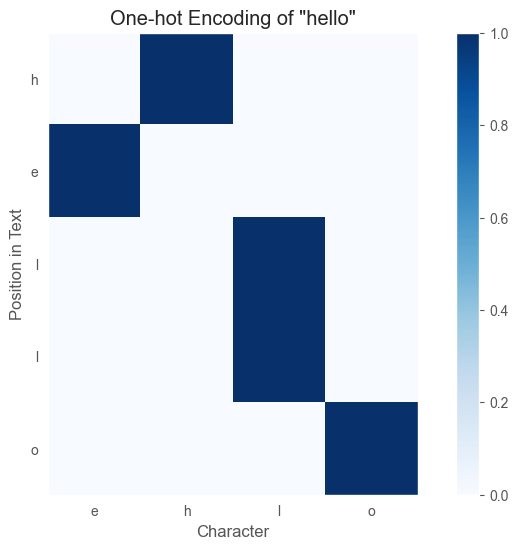

In [49]:
# Sample text data
text = "hello"

# Create character vocabulary
vocab = sorted(set(text))
char_to_idx = dict(zip(vocab, range(len(vocab)), strict=False))
idx_to_char = dict(zip(range(len(vocab)), vocab, strict=False))

print(f"Text: {text}")
print(f"Vocabulary: {vocab}")
print(f"Character to index mapping: {char_to_idx}")

# Convert text to indices
indices = [char_to_idx[char] for char in text]
print(f"\nIndices: {indices}")

# One-hot encode the indices
one_hot = np.zeros((len(indices), len(vocab)))
for i, idx in enumerate(indices):
    one_hot[i, idx] = 1

print(f"\nOne-hot encoded:\n{one_hot}")

# Visualize the one-hot encoding
plt.figure(figsize=(10, 6))
plt.imshow(one_hot, cmap="Blues")
plt.xticks(range(len(vocab)), vocab)
plt.yticks(range(len(text)), list(text))
plt.colorbar()
plt.title('One-hot Encoding of "hello"')
plt.xlabel("Character")
plt.ylabel("Position in Text")
plt.grid(False)
plt.show()

### Connection to Software Engineering

One-hot encoding is similar to the concept of normalization in database design, where you create separate tables for different entities and use foreign keys to reference them. In one-hot encoding, you're essentially creating a sparse representation where each category gets its own dimension.


## 5. Practical Application: Bigram Frequency Analysis

Now let's apply these concepts to a real-world problem: analyzing character bigrams (pairs of adjacent characters) in a dataset of names. This will serve as a foundation for our language modeling work in later modules.

We'll load a dataset of names and count the frequency of character bigrams using vectorized operations.


In [50]:
# Load the names dataset
with open("../data/names.txt") as f:
    names = f.read().splitlines()

# Take a look at the first few names
print(f"First 10 names: {names[:10]}")
print(f"Total number of names: {len(names)}")

First 10 names: ['emma', 'olivia', 'ava', 'isabella', 'sophia', 'charlotte', 'mia', 'amelia', 'harper', 'evelyn']
Total number of names: 32033


In [51]:
# Add start and end tokens to each name
names_with_tokens = ["<" + name.lower() + ">" for name in names]

# Create vocabulary of all possible characters
all_chars = set()
for name in names_with_tokens:
    all_chars.update(name)

vocab = ["<", ">"] + sorted(all_chars - {"<", ">"})
char_to_idx = dict(zip(vocab, range(len(vocab)), strict=False))

print(f"Vocabulary size: {len(vocab)}")
print(f"Vocabulary: {vocab}")

Vocabulary size: 28
Vocabulary: ['<', '>', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']


In [52]:
# Count bigram frequencies
bigram_counts = np.zeros((len(vocab), len(vocab)))

for name in names_with_tokens:
    for c1, c2 in zip(name, name[1:], strict=False):
        bigram_counts[char_to_idx[c1], char_to_idx[c2]] += 1

# Convert counts to probabilities
bigram_probs = bigram_counts / bigram_counts.sum(axis=1, keepdims=True)

# Handle division by zero (rows with all zeros)
bigram_probs = np.nan_to_num(bigram_probs)

/var/folders/nx/rm5sctm56cd7jv9zxnmstgm80000gq/T/ipykernel_88786/2526531644.py:9: RuntimeWarning: invalid value encountered in divide
  bigram_probs = bigram_counts / bigram_counts.sum(axis=1, keepdims=True)


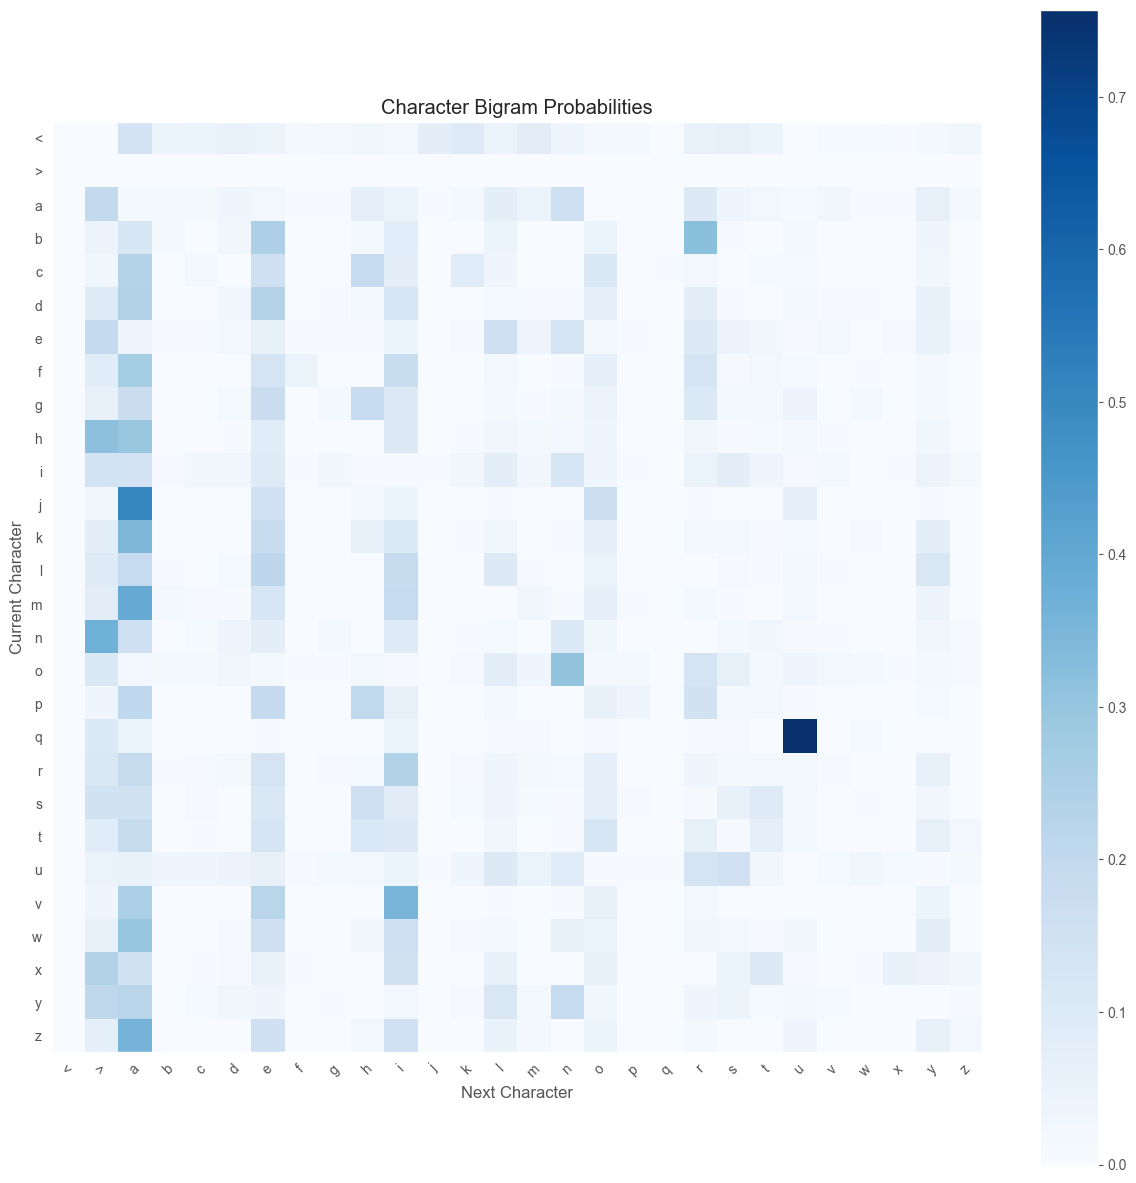

In [53]:
# Visualize the bigram probabilities
plt.figure(figsize=(15, 15))
plt.imshow(bigram_probs, cmap="Blues")

# Add labels
plt.xticks(range(len(vocab)), vocab, rotation=45)
plt.yticks(range(len(vocab)), vocab)

plt.title("Character Bigram Probabilities")
plt.xlabel("Next Character")
plt.ylabel("Current Character")

# Add a colorbar
plt.colorbar()

# Add grid lines
plt.grid(False)
plt.show()

### Analyzing the Results

From the heatmap, we can observe patterns in how characters follow each other in names:

1. After the start token `<`, certain characters are much more likely (common first letters in names)
2. Certain character pairs are very common (like 'th', 'er', 'an')
3. Many character combinations never occur (shown as dark blue)

This bigram analysis forms the foundation of a simple language model that can generate new names by sampling from these probability distributions.


## 6. Performance Comparison: Loop vs. Vectorized Implementation

To reinforce the importance of vectorization, let's compare the performance of loop-based and vectorized implementations for computing bigram probabilities.


In [54]:
# Loop-based implementation
def compute_bigram_probs_loop(names: list[str], vocab: list[str]) -> np.ndarray:
    char_to_idx = dict(zip(vocab, range(len(vocab)), strict=False))
    bigram_counts = np.zeros((len(vocab), len(vocab)))

    for name in names:
        for i in range(len(name) - 1):
            c1, c2 = name[i], name[i + 1]
            bigram_counts[char_to_idx[c1], char_to_idx[c2]] += 1

    # Convert counts to probabilities
    bigram_probs = np.zeros_like(bigram_counts)
    for i in range(len(vocab)):
        row_sum = np.sum(bigram_counts[i])
        if row_sum > 0:
            bigram_probs[i] = bigram_counts[i] / row_sum

    return bigram_probs


# Vectorized implementation
def compute_bigram_probs_vectorized(names: list[str], vocab: list[str]) -> np.ndarray:
    char_to_idx = dict(zip(vocab, range(len(vocab)), strict=False))
    bigram_counts = np.zeros((len(vocab), len(vocab)))

    for name in names:
        for c1, c2 in zip(name, name[1:], strict=False):
            bigram_counts[char_to_idx[c1], char_to_idx[c2]] += 1

    # Convert counts to probabilities using broadcasting
    row_sums = bigram_counts.sum(axis=1, keepdims=True)
    bigram_probs = np.divide(
        bigram_counts, row_sums, out=np.zeros_like(bigram_counts), where=row_sums != 0
    )

    return bigram_probs


# Time comparison
start = time.time()
loop_probs = compute_bigram_probs_loop(names_with_tokens, vocab)
loop_time = time.time() - start

start = time.time()
vector_probs = compute_bigram_probs_vectorized(names_with_tokens, vocab)
vector_time = time.time() - start

print(f"Loop-based approach: {loop_time:.6f} seconds")
print(f"Vectorized approach: {vector_time:.6f} seconds")
print(f"Speedup: {loop_time / vector_time:.2f}x")
print(f"Results match: {np.allclose(loop_probs, vector_probs)}")

Loop-based approach: 0.278934 seconds
Vectorized approach: 0.326306 seconds
Speedup: 0.85x
Results match: True


## Summary

In this module, we've covered the fundamental Python and NumPy concepts that form the foundation of machine learning implementations:

1. **Vectorization**: Using array operations instead of loops for better performance
2. **Broadcasting**: Performing operations on arrays of different shapes
3. **Memory Layout**: Understanding how data is stored and accessed in memory
4. **Data Transformations**: Converting categorical data to numerical representations

We've also applied these concepts to a practical problem: analyzing character bigrams in a dataset of names. This analysis will serve as a foundation for our language modeling work in the next modules.

### Key Takeaways for Senior Developers

- **Think in Arrays, Not Items**: ML code operates on entire datasets at once
- **Optimize for Memory Access**: Understanding data layout can lead to significant performance gains
- **Leverage Broadcasting**: Use NumPy's broadcasting to write concise, efficient code
- **Represent Data Numerically**: Convert all inputs to numerical form for ML algorithms

In the next module, we'll build on these foundations to explore the mathematical concepts behind machine learning, including probability distributions, information theory, and optimization.